<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [2]:
### Type your code here

transactions = pd.read_csv('transactions.csv', sep = ',', nrows = 1000000)
gender_train = pd.read_csv('gender_train.csv', sep = ',')
tr_mcc_codes = pd.read_csv('tr_mcc_codes.csv', sep = ';')
tr_types = pd.read_csv('tr_types.csv', sep = ';', encoding = 'UTF-8')

In [3]:
transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN
...,...,...,...,...,...,...
999995,98801178,269 10:29:06,5921,1010,-23016.59,127873
999996,98801178,270 10:26:45,5211,1010,-61380.88,10114209
999997,98801178,270 15:18:53,5921,1010,-11800.27,10105341
999998,98801178,271 12:47:13,5211,1010,-16170.59,10114209


In [4]:
tr_mcc_codes

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело
...,...,...
179,9211,"Судовые выплаты, включая алименты и детскую по..."
180,9222,Штрафы
181,9311,Налоговые платежи
182,9399,"Правительственные услуги, нигде ранее не класс..."


In [5]:
tr_types

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...
...,...,...
150,2990,Списание по требованию
151,2992,Списание средств для погашения задолженности п...
152,3001,Комиссия за обслуживание ссудного счета
153,3030,Плата за обслуживание банковской карты (за пос...


In [6]:
gender_train

,customer_id,gender
0,10928546,1
1,69348468,1
2,61009479,0
3,74045822,0
4,27979606,1
...,...,...
8395,90417572,0
8396,66837341,0
8397,10758984,1
8398,11376556,0


#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [14]:
### Type your code here

df = pd.merge(transactions, tr_mcc_codes, on = 'mcc_code', how = 'inner')

df = pd.merge(df, tr_types, on = 'tr_type', how = 'inner')

df = pd.merge(df, gender_train, on = 'customer_id', how = 'left')
len(df)
#df

999584

#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [34]:
### Type your code here

trati = df[df.amount < 0] # фрейм с тратами мужчин и женщин

trati_gender_mean = trati.groupby('gender')['amount'].mean() # series со средними значениями amount по 2 группам: мужчин и женщин

round(abs(trati_gender_mean.loc[0] - trati_gender_mean.loc[1]), ndigits=2) # 32718.05 - модуль разницы между средними тратами женщин и мужчин

#trati_gender_mean

32718.05

#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [41]:
### Type your code here

df['mcc_code+tr_type'] = df.mcc_code.astype(str) + df.tr_type.astype(str) # новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов
#df['mcc_code+tr_type'] = df.apply(lambda x: str(x.mcc_code) + str(x.tr_type), axis=1) # через apply()

negative_amount_group = df[df.amount < 0].groupby('mcc_code+tr_type', as_index=False).amount # оставлены только наблюдения с отрицательным значением amount. Далее разбиты на группы по mcc_code+tr_type и оставлена колонка значений amount

var_negative_amount_group = negative_amount_group.agg(['count', 'var']).query('count >= 10')["var"] # посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10.

round(var_negative_amount_group.max() / var_negative_amount_group.min()) # 9170599 - отношение максимальной дисперсии к минимальной.

9170599

#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [59]:
### Type your code here

df_g0 = df.query('amount > 0 & gender == 0').groupby('tr_description').agg({"amount": "max"}).sort_values("amount").head(5) # отсортированные в порядке возрастания первые 5 значений максимального дохода пола с индексом 0 (которые перед этим разбиты на группы по типу транзакций)
df_g0 = df_g0.rename(columns = {'amount' : 'max_income'})

df_g1 = df.query('amount > 0 & gender == 1').groupby('tr_description').agg({"amount": "max"}).sort_values("amount").head(5)
df_g1 = df_g1.rename(columns = {'amount' : 'max_income'})

df_g0

,max_income
tr_description,
Плата за перевод на карту (с карты) через АТМ (из одного ТБ в другой ТБ),1122.96
Плата за получение наличных в АТМ. Зарубеж.,2245.92
Плата за получение наличных в АТМ. Россия,2245.92
Списание с карты на карту по операции <перевода с карты на карту> через Мобильный банк (без комиссии),2335.75
Плата за получение наличных. Россия,5041.86


In [61]:
df_g1

,max_income
tr_description,
Плата за получение наличных в АТМ. Россия,2245.92
Выдача наличных через POS Сбербанка,2245.92
Покупка. POS ТУ СБ РФ,28803.87
Списание после проведения претензионной работы,64682.37
Возврат покупки. ТУ СБ РФ,79280.83


In [62]:
# Ответ: Плата за получение наличных в АТМ. Россия - 5

#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [64]:
df.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,mcc_code+tr_type
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030


In [65]:
df['tr_day'] = df.tr_datetime.str.split().str[0]

In [100]:
table1 = df[df.groupby('tr_day').mcc_code.transform('nunique') > 75]  # в логическом условии бьем по группам в зависимости от дня, берем столбец mcc_code, применяем к нему transform, который ищет количество уникальных значений в группе и ставим условие > 75
table1

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,mcc_code+tr_type,tr_day
6,39026145,13 11:17:34,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,13
7,39026145,18 07:39:05,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,18
8,39026145,19 13:24:35,4814,1030,-449.18,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,19
9,39026145,19 13:25:31,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,19
12,39026145,29 11:29:57,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,29
...,...,...,...,...,...,...,...,...,...,...,...
999576,9055616,270 23:37:21,3000,6000,570417.69,290594,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,0.0,30006000,270
999577,14937933,77 23:37:59,3000,6000,75687.36,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,30006000,77
999578,61463328,275 23:37:29,3000,6000,286601.31,290594,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,30006000,275
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,30006000,18


In [99]:
# table1.groupby(['mcc_description'], as_index=False).count().mcc_description.head(60) # смотрю первые 60 описаний транзакций

In [106]:
table1.groupby(['mcc_code', 'mcc_description', 'gender'])['amount'].median().abs()

mcc_code  mcc_description                                                      gender
742       Ветеринарные услуги                                                  0.0        19651.76
                                                                               1.0        47770.63
1711      Генеральные подрядчики по вентиляции, теплоснабжению, и водопроводу  0.0       674897.69
                                                                               1.0        14912.88
1731      Подрядчики по электричеству                                          1.0        55923.30
                                                                                           ...    
9311      Налоговые платежи                                                    0.0        10460.80
                                                                               1.0        11229.58
9399      Правительственные услуги, нигде ранее не классифицируемые            0.0        23761.79
                       

In [102]:
# Хочу проверить, кто мужчина, а кто женщина по медианным расходам в каждой группе по некоторым типам транзакций
print(table1[table1.mcc_description == 'Готовая женская одежда'].query('amount < 0').groupby(['mcc_description', 'gender'])['amount'].median())
print(table1[table1.mcc_description == 'Изготовление и продажа меховых изделий'].query('amount < 0').groupby(['mcc_description', 'gender'])['amount'].median())
print(table1[table1.mcc_description == 'Лесо- и строительный материал'].query('amount < 0').groupby(['mcc_description', 'gender'])['amount'].median())
print(table1[table1.mcc_description == 'Аксессуары для женщин'].query('amount < 0').groupby(['mcc_description', 'gender'])['amount'].median())
# По медиане расходов расходам видим, что gender 0 больше тратит на лесо- и строительные материалы, меньше тратит на меховые изделия и примерно одинаково с gender 1 на женскую одежду, и меньше тратит на аксессуары для женщин
# Мое предположение, что 0 - мужчина, 1 - женщина


mcc_description         gender
Готовая женская одежда  0.0      -45273.170
                        1.0      -43031.745
Name: amount, dtype: float64
mcc_description                         gender
Изготовление и продажа меховых изделий  0.0      -179673.26
                                        1.0      -303872.40
Name: amount, dtype: float64
mcc_description                gender
Лесо- и строительный материал  0.0      -18043.91
                               1.0      -10592.30
Name: amount, dtype: float64
mcc_description        gender
Аксессуары для женщин  0.0      -18641.10
                       1.0      -35405.51
Name: amount, dtype: float64


In [104]:
print(table1[table1.mcc_description == 'Флористика'].groupby(['mcc_description', 'gender'])['amount'].median().abs())
print(table1[table1.mcc_description == 'Ценные бумаги: брокеры/дилеры'].groupby(['mcc_description', 'gender'])['amount'].median().abs())
print(table1[table1.mcc_description == 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков'].groupby(['mcc_description', 'gender'])['amount'].median().abs())
# 1 везде больше тратят
# ответ 2 4 - правильные, если конечно я не ошибся с полом

mcc_description  gender
Флористика       0.0       13890.99
                 1.0       18865.69
Name: amount, dtype: float64
mcc_description                gender
Ценные бумаги: брокеры/дилеры  0.0        6737.75
                               1.0       11229.58
Name: amount, dtype: float64
mcc_description                                                                              gender
Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков  0.0        9387.93
                                                                                             1.0       13475.49
Name: amount, dtype: float64


#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [142]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

In [143]:
df["amount_bucket"] = pd.qcut(df[df.amount < 0].amount, 5, labels = ['Very High','High','Middle','Low','Very Low'])
#df.sort_values(by="amount", ascending=False) # проверили, что максимальные траты соотв. Very-high

In [144]:
df['amount_bucket'] = df["amount_bucket"].cat.add_categories('Income').fillna('Income')

In [138]:
# df.sort_values(by="amount", ascending=False) # посмотрел, что income добавился

In [151]:
df['tr_hour'] = df.tr_datetime.str.split().str[1].str.split(':').str[0] # получаем время

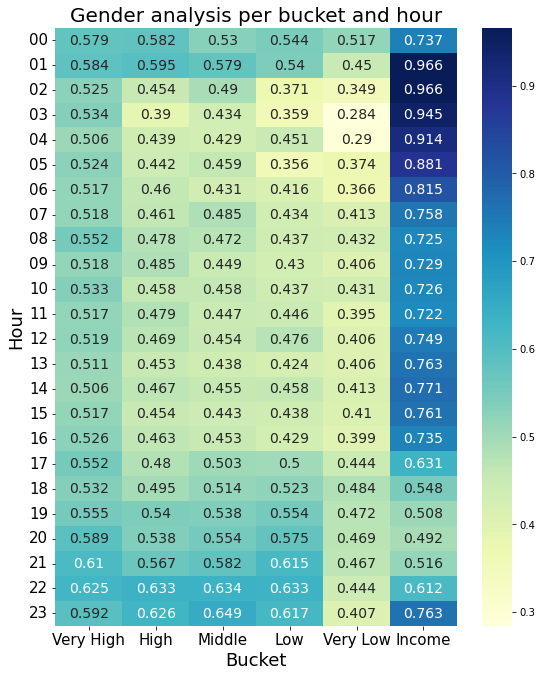

In [152]:
# Type your code here

svod = df.pivot_table(values = 'gender', index = 'tr_hour', columns = 'amount_bucket')

plot_pivot_table(svod)

# Ответ: 2 (наверное я все же ошибся с полом)

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [160]:
# Type your code here

df['tr_day'] = df.tr_day.astype(int)

table_popular_mcc = df[df.groupby('mcc_code')['mcc_code'].transform('count') > 60000]

t = table_popular_mcc.groupby(['tr_day', 'mcc_code', 'mcc_description'])['amount'].mean()

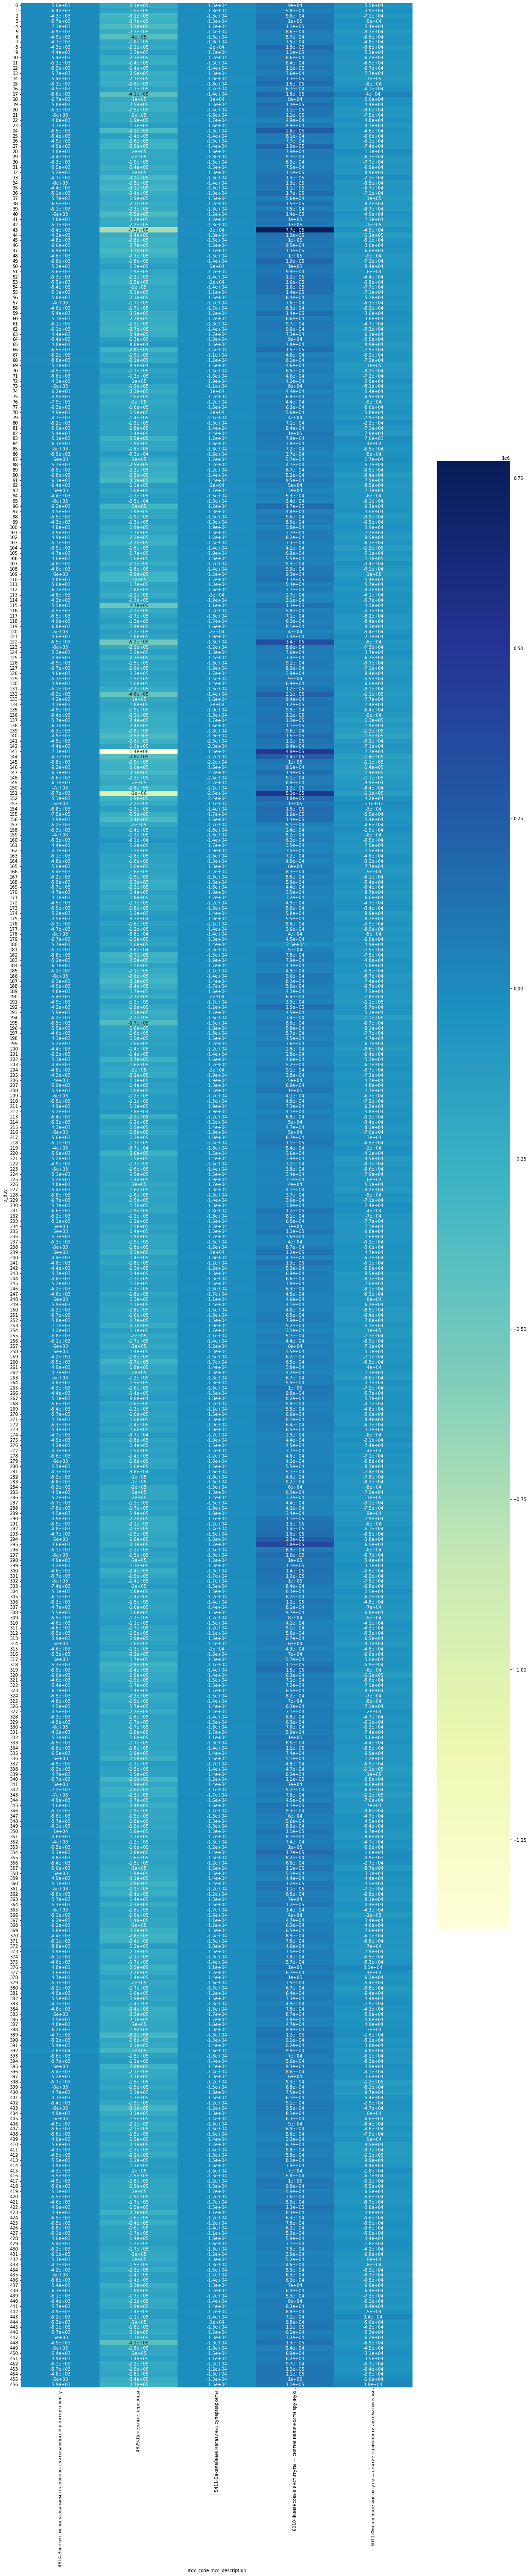

In [154]:
def plot_pivot_table2(pivot_table):
    plt.figure(figsize=(20, 100))
    sns.heatmap(pivot_table, cmap = "YlGnBu", annot = True)
    plt.show()    
plot_pivot_table2(t.unstack([1,2]))
# Ответ 1, 2, 4